In [2]:
def maximum_sum_nonadjacent_subsequence(arr):
    N = len(arr)
    dp = [0 for _ in range(N)]
    dp[N - 1] = max(arr[N - 1], 0)
    dp[N - 2] = max(max(arr[N - 1], arr[N - 2]), 0)
    for i in range(N - 3, -1, -1):
        dp[i] = max(max(dp[i + 1], arr[i] + dp[i + 2]), 0)

    result = []
    can_use_next_item_arr=[]
    can_use_next_item = True
    can_use_next_item_arr.append(True)
    for i in range(N - 2):
        if dp[i] == arr[i] + dp[i + 2] and can_use_next_item:
            result.append(1)
            can_use_next_item = False
            can_use_next_item_arr.append(False)
        else:
            result.append(2)
            can_use_next_item = True
            can_use_next_item_arr.append(True)

    if dp[N - 2] == arr[N - 2] and can_use_next_item:
        result.append(1)
        can_use_next_item = False
        can_use_next_item_arr.append(False)
    else:
        result.append(2)
        can_use_next_item = True
        can_use_next_item_arr.append(True)

    if dp[N - 1] == arr[N - 1] and can_use_next_item:
        result.append(1)
    else:
        result.append(2)

    return result,dp,can_use_next_item_arr


def top_outputs(arr,result,dp):
    prompt_template1='Compute the maximum sum of nonadjacent subsequences of {}\nSolution: '
    output_template1='Call: Create dp array {}\n'
    prompt_template2='Compute the maximum sum of nonadjacent subsequences of {}\nSolution: Call: Create dp array {}\nReturn: {}\nAnswer: '
    output_template2='Call: Create chosen indices array: sum array {}, item array {}, can use item True\n'
    ret1=(prompt_template1.format(str(arr)),output_template1.format(str(arr)))
    ret2=(prompt_template2.format(str(arr),str(arr),str(dp)),output_template2.format(str(dp),str(arr)))
    return[ret1,ret2]
    
# if this doesn't work, could add explicit computation of sum and max
# so after the return dp[i+1:], also have max(dp[i+1],arr[i]+dp[i+2])=x then output x+dp[i+1:]
def dp_outputs_prev(arr,dp):
    prompt_template1='Create dp array {}\nSolution: '
    output_template1='Call: Create dp array {}\n'
    prompt_template2='Create dp array {}\nSolution: Call: Create dp array {}\nReturn: {}\nAnswer: '
    output_template2='{}'
    rets=[]
    for i in range(len(dp)-1):
        rets.append((prompt_template1.format(str(arr[i:])),output_template1.format(str(arr[i+1:]))))
        rets.append((prompt_template2.format(str(arr[i:]),str(arr[i+1:]),str(dp[i+1:])),output_template2.format(str(dp[i:]))))
    rets.append((prompt_template1.format(str(arr[-1:])),output_template2.format(str(dp[-1:]))))
    return rets

def dp_outputs(arr,dp):
    prompt_template1='Create dp array {}\nSolution: '
    output_template1='Call with array minus first element. Call: Create dp array {}\n'
    prompt_template2='Create dp array {}\nSolution: Call with array minus first element. Call: Create dp array {}\nReturn: {}\nAnswer: '
    output_template2='Append max(return[0], array[0] + return[1]) to return.\nAnswer: {}'
    output_template3='Return [0] if negative else element.\nAnswer: {}'
    rets=[]
    for i in range(len(dp)-1):
        rets.append((prompt_template1.format(str(arr[i:])),output_template1.format(str(arr[i+1:]))))
        rets.append((prompt_template2.format(str(arr[i:]),str(arr[i+1:]),str(dp[i+1:])),output_template2.format(str(dp[i:]))))
    rets.append((prompt_template1.format(str(arr[-1:])),output_template3.format(str(dp[-1:]))))
    return rets
    
# since the current answer doesn't depend on call
# we could have it first output the current computation, then do the call, then concat
# so Solution: [1 or 2], Call: ... Return: arr Answer: [1 or 2] plus arr
# just in case it gets confused on what computation it is suppose to do
def indices_outputs_prev(arr,result,dp,can_use_next_item_arr):
    prompt_template1='Create chosen indices {} {} {}\nSolution: '
    output_template1='Call: Create chosen indices {} {} {}\n'
    prompt_template2='Return {}\nAnswer: '
    rets=[]
    # don't think we need separate case for n-2 index, but check to make sure
    for i in range(len(arr)-1):
        formatted_prompt1=prompt_template1.format(str(dp[i:]),str(arr[i:]),can_use_next_item_arr[i])
        formatted_output1=output_template1.format(str(dp[i+1:]),str(arr[i+1:]),can_use_next_item_arr[i+1])
        formatted_prompt2=formatted_prompt1+formatted_output1+prompt_template2.format(str(result[i+1:]))
        formatted_output2=str(result[i:])
        rets.append((formatted_prompt1,formatted_output1))
        rets.append((formatted_prompt2,formatted_output2))
    formatted_prompt1=prompt_template1.format(str(dp[-1:]),str(arr[-1:]),can_use_next_item_arr[-1])
    formatted_output=str(result[-1:])
    rets.append((formatted_prompt1,formatted_output))
    return rets
    
def indices_outputs(arr,result,dp,can_use_next_item_arr):
    call_template='Create chosen indices array: sum array {}, item array {}, can use item {}\n'
    pre_output_template='If there is only 1 item, return 1 if we should use it else 2.'
    prompt_template1=call_template+'Solution: '
    output_template1=pre_output_template+' If we should use the first item to get the sum, call False else True. Call: '+call_template
    prompt_template2='Return {}\nAnswer: '
    output_template2='Append 1 if False else 2.\nAnswer: {}'
    output_template3=pre_output_template+'\nAnswer: {}'
    
    rets=[]
    # don't think we need separate case for n-2 index, but check to make sure
    for i in range(len(arr)-1):
        formatted_prompt1=prompt_template1.format(str(dp[i:]),str(arr[i:]),can_use_next_item_arr[i])
        formatted_output1=output_template1.format(str(dp[i+1:]),str(arr[i+1:]),can_use_next_item_arr[i+1])
        formatted_prompt2=formatted_prompt1+formatted_output1+prompt_template2.format(str(result[i+1:]))
        formatted_output2=output_template2.format(str(result[i:]))
        rets.append((formatted_prompt1,formatted_output1))
        rets.append((formatted_prompt2,formatted_output2))
    formatted_prompt1=prompt_template1.format(str(dp[-1:]),str(arr[-1:]),can_use_next_item_arr[-1])
    formatted_output=output_template3.format(str(result[-1:]))
    rets.append((formatted_prompt1,formatted_output))
    return rets

def indices_outputs_new(arr,result,dp,can_use_next_item_arr):
    call_template='Create chosen indices array: sum array {}, item array {}, can use item {}\n'
    pre_output_template='If there is only 1 item, return 1 if we should use it else 2.'
    prompt_template1=call_template+'Solution: '
    output_template1=pre_output_template+' If sum[0] = item[0] + sum[2] and can use, call False else True on arrays without first item. Call: '+call_template
    prompt_template2='Return {}\nAnswer: '
    output_template2='Append 1 if False else 2.\nAnswer: {}'
    output_template3=pre_output_template+'\nAnswer: {}'
    
    rets=[]
    # don't think we need separate case for n-2 index, but check to make sure
    for i in range(len(arr)-1):
        formatted_prompt1=prompt_template1.format(str(dp[i:]),str(arr[i:]),can_use_next_item_arr[i])
        formatted_output1=output_template1.format(str(dp[i+1:]),str(arr[i+1:]),can_use_next_item_arr[i+1])
        formatted_prompt2=formatted_prompt1+formatted_output1+prompt_template2.format(str(result[i+1:]))
        formatted_output2=output_template2.format(str(result[i:]))
        rets.append((formatted_prompt1,formatted_output1))
        rets.append((formatted_prompt2,formatted_output2))
    formatted_prompt1=prompt_template1.format(str(dp[-1:]),str(arr[-1:]),can_use_next_item_arr[-1])
    formatted_output=output_template3.format(str(result[-1:]))
    rets.append((formatted_prompt1,formatted_output))
    return rets

import re
def check_bracketed_string(input_string):
    # The regular expression pattern '[.]' means "any character between square brackets"
    pattern = r'\[.\]'
    if re.search(pattern, input_string):
        return True
    else:
        return False
    
check_bracketed_string('[   ]')

False

In [3]:
import itertools

def generate_lists(length):
    numbers = range(-5, 6)  # Integers from -5 to 5 inclusive.
    # Convert tuples to lists.
    return [list(item) for item in itertools.product(numbers, repeat=length)]

dataset=[]

for list_length in range(2,6):
    samples=generate_lists(list_length)
    #if list_length==4:samples=random.sample(samples,5000)
    #if list_length==5:samples=random.sample(samples,9000)
    
    print(len(samples))
    for arr in samples:
        result,dp,can_use_next_item_arr=maximum_sum_nonadjacent_subsequence(arr)
        outputs=top_outputs(arr,result,dp)
        outputs.extend(dp_outputs(arr,dp))
        outputs.extend(indices_outputs(arr,result,dp,can_use_next_item_arr))
        for output in outputs:
            dataset.append({"input": output[0], "output": output[1]})

print(len(dataset))

121
1331
14641
161051
3472216


In [4]:
from collections import defaultdict
import tqdm
data = defaultdict(lambda: defaultdict(list))
for i, row in enumerate(tqdm.tqdm(dataset, desc=f'Processing data', disable=False)):
    prompt = row['input']
    data[prompt]['sft_target'] = row['output']

Processing data: 100%|███████████| 3472216/3472216 [00:02<00:00, 1200988.55it/s]


In [5]:
import re
import matplotlib.pyplot as plt
import random

def dp_resampler(data_point):
    if find_array_length(data_point[0]) == 1:
        return [data_point]*250
    if find_array_length(data_point[0]) == 2:
        return [data_point]*30
    if find_array_length(data_point[0]) == 3:
        return [data_point]*4
    return [data_point]

def resample_point(resampler_str, data_point):
    if resampler_str == 'parity':
        return parity_resampler(data_point)
    elif resampler_str == 'dp':
        return dp_resampler(data_point)
    elif resampler_str == 'addition':
        return addition_resampler(data_point)
    else: print('incorrect resampler string')

def find_array_length(s):
    # Regular expression to find an array pattern
    match = re.search(r'\[(-?\d+,\s*)*(-?\d+)\]', s)
    if match:
        # Extracting the array string
        array_str = match.group(0)
        # Splitting the array string into elements
        array_elements = array_str[1:-1].split(',')
        return len(array_elements)
    else:
        return None

In [6]:
resampled_data=[]
for prompt, dat in data.items():
    if find_array_length(prompt)==5 and random.random() < .85: continue
    resampled_data.extend(resample_point('dp',(prompt, dat['sft_target'])))

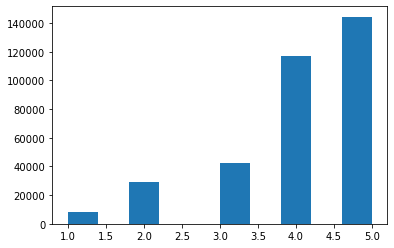

In [7]:
lengths2=[]
for point in resampled_data:
    lengths2.append(find_array_length(point[0]))
plt.hist(lengths2)
plt.show()

In [8]:
resampled_dataset=[]
for point in resampled_data:
    resampled_dataset.append({'input':point[0],'output':point[1]})

In [9]:
import json
with open("recursive_dp_resampled_test.json", "w") as f:
    json.dump(resampled_dataset, f, indent=4)